In [1]:
## important libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# read data

data=pd.read_csv("c:\\data\\Dataset salary 2024.csv")

data.info()

data.isnull().sum()

data = data.drop(columns=["salary" , "salary_currency"])
data.head()

data["company_location"].value_counts()
data.nunique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16534 entries, 0 to 16533
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           16534 non-null  int64 
 1   experience_level    16534 non-null  object
 2   employment_type     16534 non-null  object
 3   job_title           16534 non-null  object
 4   salary              16534 non-null  int64 
 5   salary_currency     16534 non-null  object
 6   salary_in_usd       16534 non-null  int64 
 7   employee_residence  16534 non-null  object
 8   remote_ratio        16534 non-null  int64 
 9   company_location    16534 non-null  object
 10  company_size        16534 non-null  object
dtypes: int64(4), object(7)
memory usage: 1.4+ MB


work_year                5
experience_level         4
employment_type          4
job_title              155
salary_in_usd         2939
employee_residence      88
remote_ratio             3
company_location        77
company_size             3
dtype: int64

In [4]:
##Let's unveil the data story through visualizations¶

data['job_title'].value_counts().head(20)

data['job_title'] = data['job_title'].replace({
    'Data Science': 'Data Scientist',
    'ML Engineer': 'Machine Learning Engineer'})


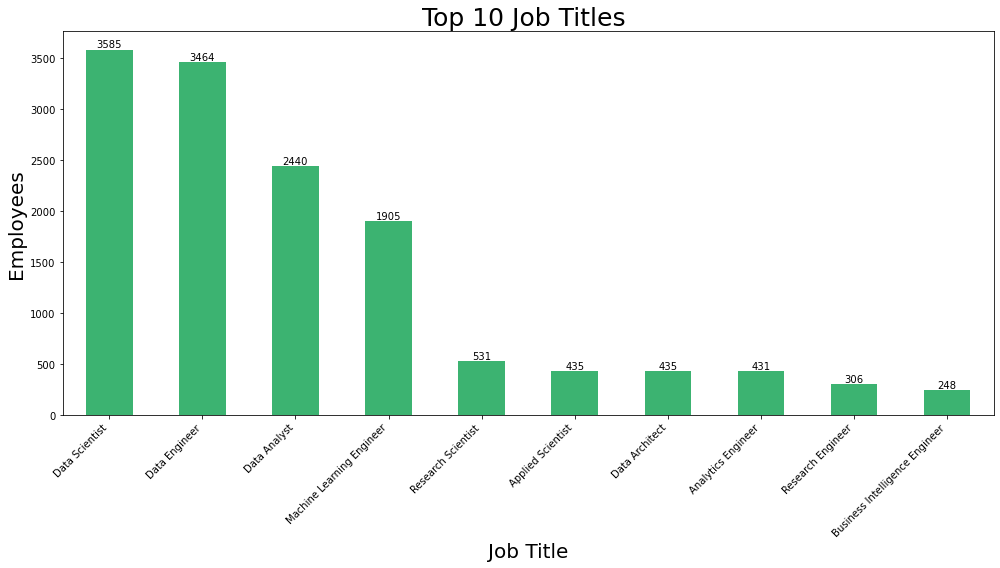

In [6]:
#Visualizing the most popular job titles

top_10_job_titles = data['job_title'].value_counts().head(10)

plt.figure(figsize=(14, 8))
bars = top_10_job_titles.plot(kind='bar', color='mediumseagreen')
plt.title('Top 10 Job Titles ', fontsize=25)
plt.xlabel('Job Title', fontsize=20)
plt.ylabel('Employees', fontsize=20)
plt.xticks(rotation=45, ha='right')

for bar in bars.patches:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, int(height), ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

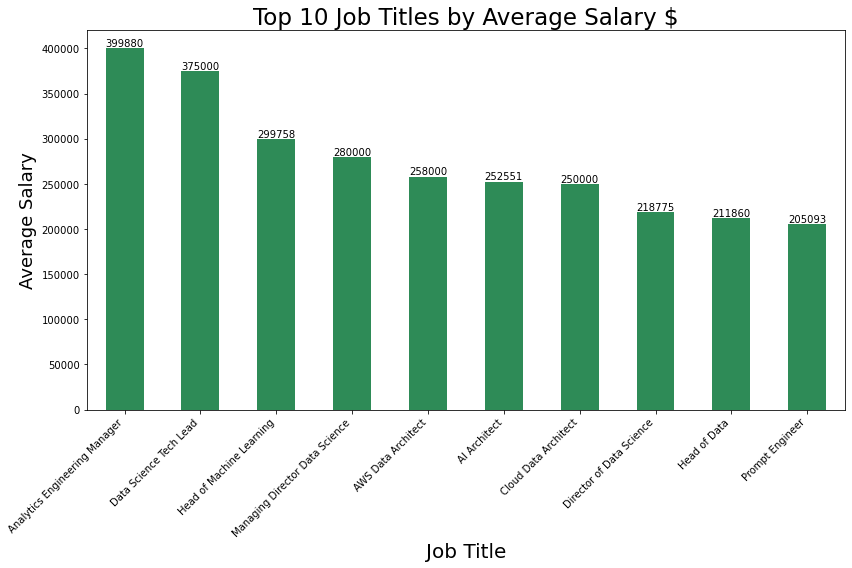

In [7]:
#Showcasing the highest-paying job titles
top_salaries = data.groupby('job_title')['salary_in_usd'].mean()
top_10_salaries = top_salaries.sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 8))
bars = top_10_salaries.plot(kind='bar', color="seagreen")
plt.title('Top 10 Job Titles by Average Salary $' , fontsize=23)
plt.xlabel('Job Title', fontsize=20)
plt.ylabel('Average Salary' , fontsize=18)
plt.xticks(rotation=45, ha='right')

for bar in bars.patches:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, int(height), ha='center', va='bottom', fontsize=10)

plt.tight_layout()

plt.show()

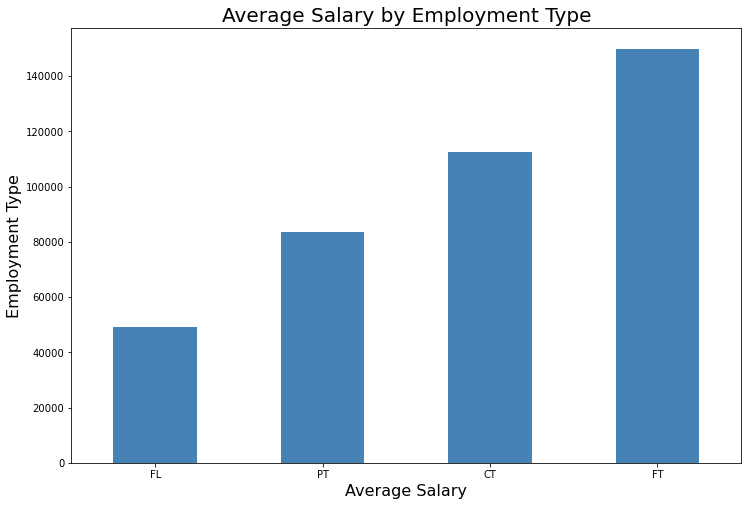

In [8]:
#What is the average salary for different employment types?
average_salary_employment = data.groupby('employment_type')['salary_in_usd'].mean()

plt.figure(figsize=(12, 8))
average_salary_employment.sort_values().plot(kind='bar', color='steelblue')
plt.title('Average Salary by Employment Type' , fontsize=20)
plt.xlabel('Average Salary' , fontsize=16)
plt.ylabel('Employment Type' , fontsize=16)
plt.xticks(rotation=0)
plt.show()


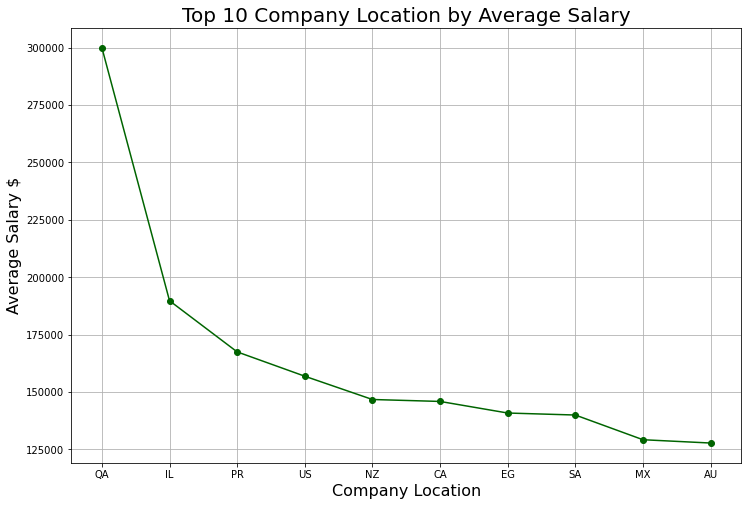

In [9]:
#What is the average salary for the top 10 job titles across different experience levels?
average_salary_location = data.groupby('company_location')['salary_in_usd'].mean()
top_10_residences = average_salary_location.nlargest(10)

plt.figure(figsize=(12, 8))
plt.plot(top_10_residences.index, top_10_residences.values, marker='o', linestyle='-', color='darkgreen')
plt.title('Top 10 Company Location by Average Salary' , fontsize=20)
plt.xlabel('Company Location' , fontsize=16)
plt.ylabel('Average Salary $' , fontsize=16)
plt.xticks(rotation=0)
plt.grid(True)
plt.show()

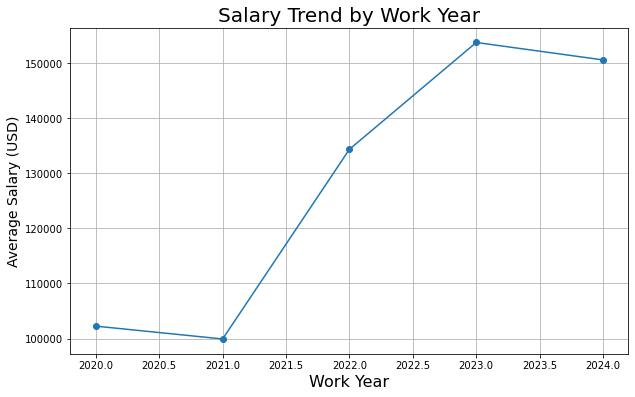

In [10]:
#Rate of Salary by Years

average_salary_by_year = data.groupby('work_year')['salary_in_usd'].mean().reset_index()

plt.figure(figsize=(10, 6))
plt.plot(average_salary_by_year['work_year'], average_salary_by_year['salary_in_usd'], marker='o')
plt.title('Salary Trend by Work Year' , fontsize=20)
plt.xlabel('Work Year' , fontsize=16)
plt.ylabel('Average Salary (USD)' , fontsize=14)
plt.grid(True)
plt.show()

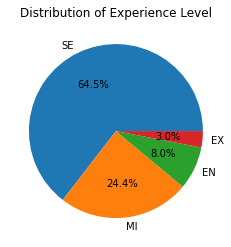

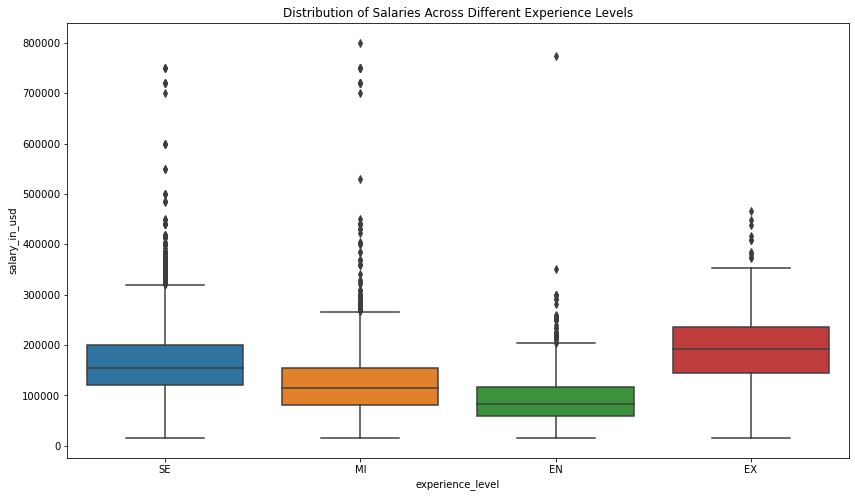

In [12]:
exp_level = data["experience_level"].value_counts()
(exp_level / sum(exp_level)) * 100


plt.pie(exp_level, labels=exp_level.index, autopct='%1.1f%%')
plt.title('Distribution of Experience Level')
plt.show()

plt.figure(figsize=(14, 8))
sns.boxplot(x='experience_level', y='salary_in_usd', data=data)
plt.title('Distribution of Salaries Across Different Experience Levels')
plt.show()

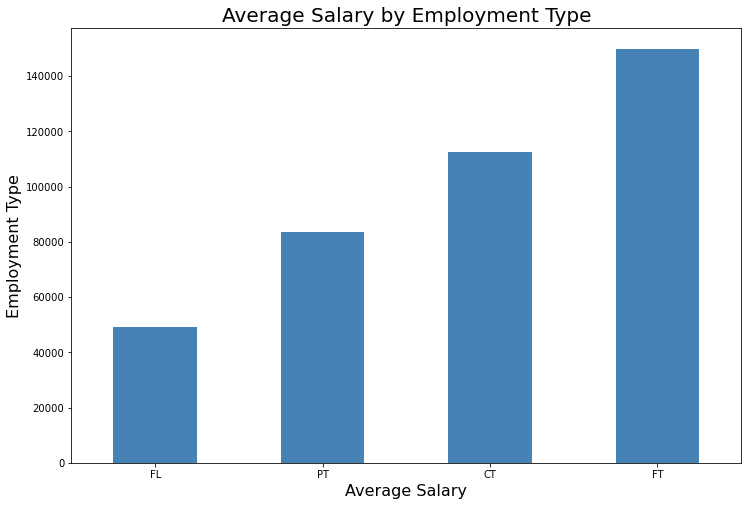

In [13]:
#What is the average salary for different employment types?
average_salary_employment = data.groupby('employment_type')['salary_in_usd'].mean()

plt.figure(figsize=(12, 8))
average_salary_employment.sort_values().plot(kind='bar', color='steelblue')
plt.title('Average Salary by Employment Type' , fontsize=20)
plt.xlabel('Average Salary' , fontsize=16)
plt.ylabel('Employment Type' , fontsize=16)
plt.xticks(rotation=0)
plt.show()